In [11]:
import cv2
from matplotlib import pyplot as plt

In [12]:
img = cv2.imread("data/solidWhiteCurve.jpg")
img  = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

In [13]:
print(img.shape)

(540, 960, 3)


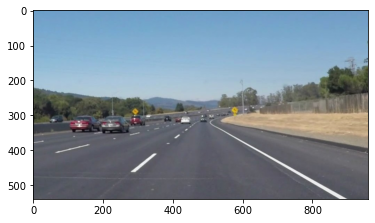

In [14]:
plt.imshow(img)
plt.savefig('images/img.png', transparent=True)

In [15]:
import numpy as np
def roi(img , vec):
    mask = np.zeros_like(img)
    if len(img.shape) == 3:
        mc = (255,) * img.shape[2]
    else:
        mc = 255
    cv2.fillPoly(mask, vec, mc)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [16]:
gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)

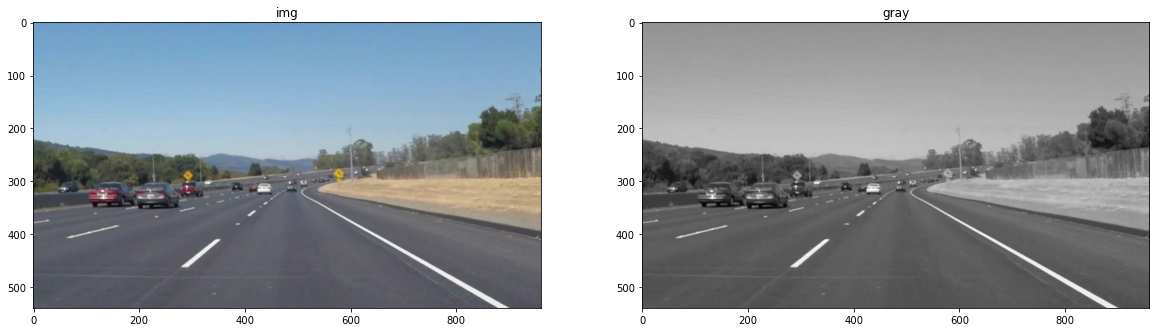

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("img")

plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
plt.title("gray")

plt.savefig('images/gray.png', transparent=True)

In [19]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

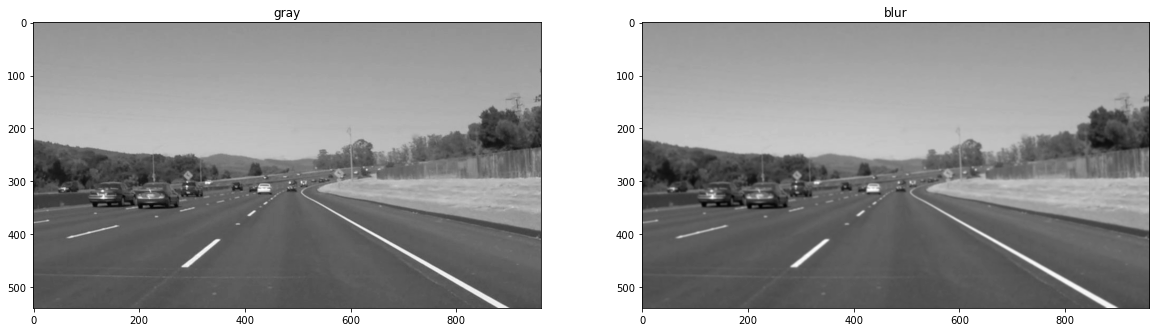

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("gray")

plt.subplot(1,2,2)
plt.imshow(blur, cmap="gray")
plt.title("blur")

plt.savefig('images/blur.png', transparent=True)

In [13]:
ci = cv2.Canny(gray, 200, 300)

Text(0.5, 1.0, 'cc')

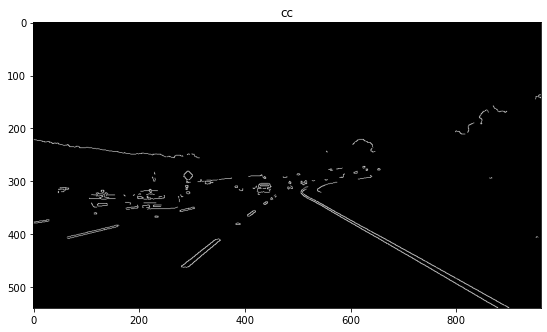

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(ci, cmap="gray")
plt.title("cc")

In [52]:
height, width = img.shape[0:2]
imshape = img.shape
x_dim = np.shape(img)[1]
y_dim = np.shape(img)[0]
vertices = np.array([[(10,y_dim-50),(x_dim-10,y_dim-50),(x_dim/2+40,y_dim/1.65),(x_dim/2-40,y_dim/1.65)]],
                  dtype = np.int32)
rc = roi(ci, vertices)

Text(0.5, 1.0, 'rc')

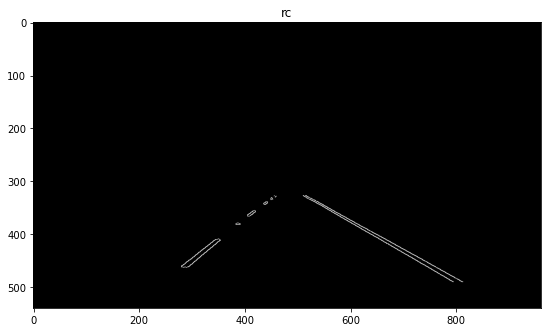

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(rc, cmap="gray")
plt.title("rc")

In [54]:
Lines = cv2.HoughLinesP(rc, rho=6, theta=np.pi/180,threshold=15, 
                        lines=np.array([]), minLineLength=10, maxLineGap=20)



In [55]:
print(Lines)

[[[616 382 654 404]]

 [[602 380 716 444]]

 [[322 427 345 410]]

 [[724 441 772 469]]

 [[757 468 782 484]]

 [[603 376 617 383]]

 [[290 463 353 412]]

 [[539 339 595 376]]

 [[732 455 747 462]]

 [[284 463 308 438]]

 [[527 333 542 345]]

 [[312 435 346 410]]

 [[778 471 797 483]]

 [[552 351 587 366]]

 [[391 382 450 331]]

 [[710 441 722 449]]

 [[738 457 760 471]]

 [[781 483 801 484]]

 [[744 452 788 478]]

 [[789 488 812 490]]

 [[596 371 604 381]]

 [[516 327 538 343]]

 [[384 380 458 330]]

 [[281 462 290 452]]

 [[675 414 685 421]]

 [[521 334 534 337]]

 [[439 344 459 328]]

 [[703 438 718 438]]

 [[700 428 731 454]]

 [[597 377 613 385]]

 [[285 463 301 456]]

 [[389 382 412 358]]

 [[282 462 297 447]]

 [[658 406 684 419]]

 [[787 487 808 488]]

 [[707 432 720 447]]

 [[547 348 580 362]]

 [[511 328 540 340]]

 [[283 462 302 455]]

 [[576 365 598 372]]

 [[701 436 713 435]]

 [[622 391 634 397]]

 [[292 451 308 450]]

 [[533 340 554 348]]

 [[689 430 711 434]]

 [[772 477

In [56]:
LineImg= np.zeros((rc.shape[0] , rc.shape[1], 3), dtype=np.uint8)

In [57]:
for cod in Lines:
    for x1, y1, x2, y2 in cod:
        cv2.line(LineImg, (x1, y1), (x2, y2), [255,255,0],2)

In [58]:
merged = np.copy(img)

In [59]:
merged = cv2.addWeighted(merged, 0.8, LineImg, 1.0, 0.0)

Text(0.5, 1.0, 'merged')

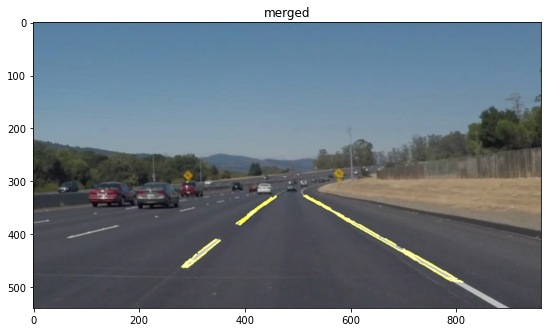

In [60]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(merged, cmap="gray")
plt.title("merged")

In [152]:
y_size = img.shape[0]
x_size = img.shape[1]
yL_n = 0
xL_n = 0
yR_n = 0
xR_n = 0
yL_n_1 = 5000
xL_n_1 = 0
yR_n_1 = 5000
xR_n_1 = 0
cutoff = 500
for cord in Lines:
    for x1,y1,x2,y2 in cord:
        if x1 < cutoff and x2 < cutoff and y1 > yL_n:
            yL_n = y1
            xL_n = x1
        if x1 < cutoff and x2 < cutoff and y2 > yL_n:
            yL_n = y2
            xL_n = x2
        if x1 < cutoff and x2 < cutoff and y1 < yL_n_1:
            yL_n_1 = y1
            xL_n_1 = x1
        if x1 < cutoff and x2 < cutoff and y2 < yL_n_1:
            yL_n_1 = y2
            xL_n_1 = x2

        if x1 > cutoff and x2 > cutoff and y1 > yR_n:
            yR_n = y1
            xR_n = x1
        if x1 > cutoff and x2 > cutoff and y2 > yR_n:
            yR_n = y2
            xR_n = x2
        if x1 > cutoff and x2 > cutoff and y1 < yR_n_1:
            yR_n_1 = y1
            xR_n_1 = x1
        if x1 > cutoff and x2 > cutoff and y2 < yR_n_1:
            yR_n_1 = y2
            xR_n_1 = x2


In [153]:
mL = (yL_n - yL_n_1) / (xL_n - xL_n_1)
mR = (yR_n - yR_n_1) / (xR_n - xR_n_1)

In [154]:
bL= (yL_n) - (mL*xL_n)
bR= (yR_n) - (mR*xR_n)

In [155]:
xLB = (y_size - bL) / mL
xRB = (y_size - bR) / mR

In [156]:
Li = np.zeros((img.shape[0] , img.shape[1], 3), dtype=np.uint8)

In [157]:
m = np.copy(img)

In [158]:
cv2.line(Li,(int(xLB), y_size),(xL_n_1, yL_n_1),(255,0,0),10)
cv2.line(Li,(int(xRB), y_size),(xR_n_1, yR_n_1),(255,255,0),10)
m = cv2.addWeighted(m, 0.8, Li, 1, 0)

Text(0.5, 1.0, 'img')

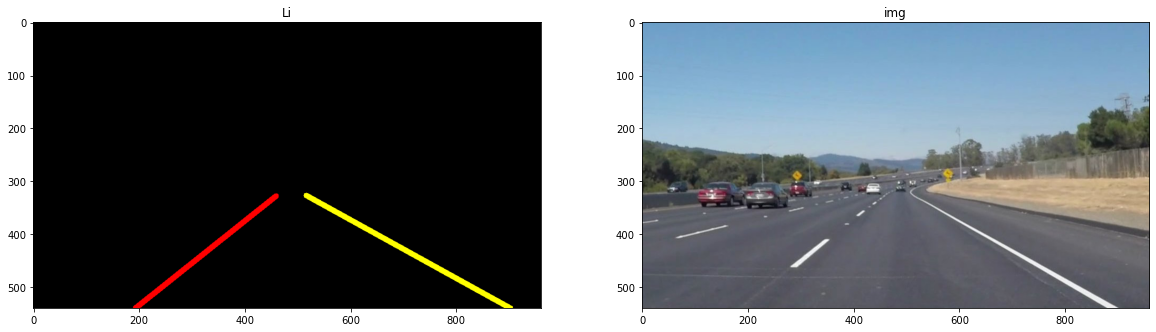

In [159]:
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.imshow(Li, cmap="gray")
plt.title("Li")

plt.subplot(1,2,2)
plt.imshow(img, cmap="gray")
plt.title("img")

In [160]:
m = cv2.addWeighted(m, 0.8, Li, 1.0, 0.0)

Text(0.5, 1.0, 'm')

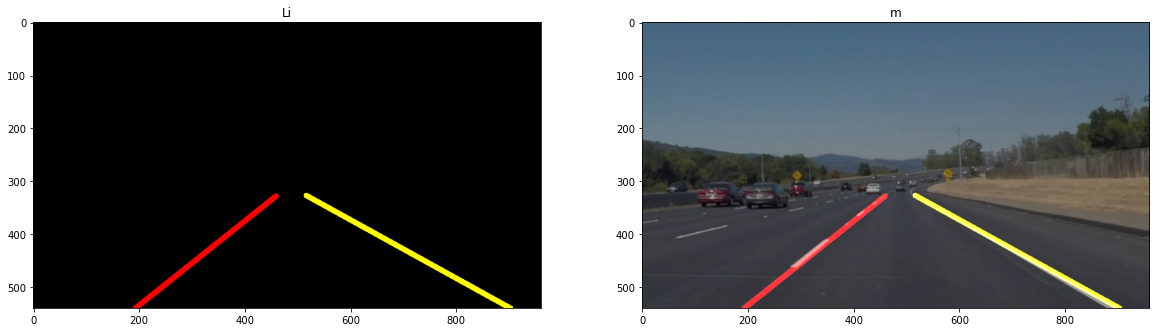

In [161]:
plt.figure(figsize=(20,20))


plt.subplot(1,2,1)
plt.imshow(Li, cmap="gray")
plt.title("Li")

plt.subplot(1,2,2)
plt.imshow(m, cmap="gray")
plt.title("m")

In [165]:
def pipe(img):
    height, width = img.shape[0:2]
    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    ci = cv2.Canny(blur, 50, 150)
    
    height, width = img.shape[0:2]
    imshape = img.shape
    x_dim = np.shape(img)[1]
    y_dim = np.shape(img)[0]
    vertices = np.array([[(10,y_dim-50),(x_dim-10,y_dim-50),(x_dim/2+40,y_dim/1.65),(x_dim/2-40,y_dim/1.65)]],
                      dtype = np.int32)
    rc = roi(ci, vertices)
    Lines = cv2.HoughLinesP(rc, rho=2, theta=np.pi/180,threshold=15, 
                        lines=np.array([]), minLineLength=10, maxLineGap=20)

    y_size = img.shape[0]
    x_size = img.shape[1]
    yL_n = 0
    xL_n = 0
    yR_n = 0
    xR_n = 0
    yL_n_1 = 5000
    xL_n_1 = 0
    yR_n_1 = 5000
    xR_n_1 = 0
    cutoff = 500
    for cord in Lines:
        for x1,y1,x2,y2 in cord:
            if x1 < cutoff and x2 < cutoff and y1 > yL_n:
                yL_n = y1
                xL_n = x1
            if x1 < cutoff and x2 < cutoff and y2 > yL_n:
                yL_n = y2
                xL_n = x2
            if x1 < cutoff and x2 < cutoff and y1 < yL_n_1:
                yL_n_1 = y1
                xL_n_1 = x1
            if x1 < cutoff and x2 < cutoff and y2 < yL_n_1:
                yL_n_1 = y2
                xL_n_1 = x2

            if x1 > cutoff and x2 > cutoff and y1 > yR_n:
                yR_n = y1
                xR_n = x1
            if x1 > cutoff and x2 > cutoff and y2 > yR_n:
                yR_n = y2
                xR_n = x2
            if x1 > cutoff and x2 > cutoff and y1 < yR_n_1:
                yR_n_1 = y1
                xR_n_1 = x1
            if x1 > cutoff and x2 > cutoff and y2 < yR_n_1:
                yR_n_1 = y2
                xR_n_1 = x2
    
    m = np.copy(img)
    mL = (yL_n - yL_n_1) / (xL_n - xL_n_1)
    mR = (yR_n - yR_n_1) / (xR_n - xR_n_1)
    bL= (yL_n) - (mL*xL_n)
    bR= (yR_n) - (mR*xR_n)
    xLB = (y_size - bL) / mL
    xRB = (y_size - bR) / mR
    Li = np.zeros((img.shape[0] , img.shape[1], 3), dtype=np.uint8)
    cv2.line(Li,(int(xLB), y_size),(xL_n_1, yL_n_1),(255,0,0),10)
    cv2.line(Li,(int(xRB), y_size),(xR_n_1, yR_n_1),(255,255,0),10)
    m = cv2.addWeighted(m, 0.8, Li, 1, 0)
    m = cv2.addWeighted(m, 0.8, Li, 1, 0)
    return m

In [166]:
import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/local/bin/ffmpeg"

In [167]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [168]:
in1 = VideoFileClip("data/vids/solidWhiteRight.mp4")
frames = in1.fl_image(pipe)
frames.write_videofile("data/vids/solidWhiteRight_output.mp4", audio=False)

Moviepy - Building video data/vids/solidWhiteRight_output.mp4.
Moviepy - Writing video data/vids/solidWhiteRight_output.mp4



Moviepy - Done !
Moviepy - video ready data/vids/solidWhiteRight_output.mp4
